# Homework 10, question 4
First we need to set up the notebook to draw the plots inline, and import some libraries:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.integrate
import scipy.optimize

The following cell will just try to make the graphs look nicer.

In [2]:
try:
    import seaborn as sns
except ImportError:
    # This block will be run if there's an ImportError, i.e you don't have seaborn installed.
    sns = False
    print ("If you want to try different figure formatting, "
           "type 'conda install seaborn' at an anaconda command prompt or terminal. "
           "See https://stanford.edu/~mwaskom/software/seaborn/ for details")
    # If not using seaborn, we can still control the size of the figures this way
    from pylab import rcParams
    rcParams['figure.figsize'] = 4, 4
else:
    # This block will be run if there is no ImportError
    sns.set_style("ticks")
    sns.set_context("poster",rc={"figure.figsize": (4, 4)})

## The system description
The following complex gas phase reactions follow elementary rate laws
$$\require{mhchem}$$
(1) $$\ce{A + 2B -> C}$$
(2) $$\ce{2A + 3C -> D}$$
and take place in a PFR. The feed is stoichiometric for reaction (1) in A and B with $F_{A0}$ = 5 mol/min. The reactor volume is 10 dm<sup>3</sup> and the total entering concentration is $C_{T0}$ = 0.2 mol/dm<sup>3</sup>. The entering pressure is 100 atm and the entering temperature is 300 K. The coolant flow rate is 50 mol/min and the entering coolant fluid has a heat capacity of $C_{P,cool}$ = 10 cal/mol/K and enters at a temperature of 325 K.

 * $-r_{1A} = k_{1A} C_A C_B^2$
 * $k_{1A} = 40$ dm<sup>6</sup>/mol<sup>2</sup>/min at 300 K with $E_1 = 8000$ cal/mol
 * $\Delta H_{Rx1B}= -1500$ cal/mole B 
 * $-r_{2C} = k_{2C} C_A^2 C_C^3$
 * $\Delta H_{Rx2A} = -10,000$ cal/mole A
 * $k_{2C} = 2$ dm<sup>12</sup>/mol<sup>4</sup>/min at 300K with $E_2 = 12,000$ cal/mol
 * $C_{P,A} = 10$ cal/mol/K
 * $C_{P,B} = 12$ cal/mol/K
 * $C_{P,C} = 14$ cal/mol/K
 * $C_{P,D} = 16$ cal/mol/K
 * $Ua = 80$ cal/min/K
 * $T_{a0} = 325$ K
 * $\dot{m} = 50$ mol/min
 * $C_{P,cool} = 10$ cal/mol/K
 
Plot $F_A$, $F_B$, $F_C$, $F_D$, $y$, $T$, $T_a$ as a function of $V$ for:

 * (a) Co-current heat exchange (cooling fluid at $\dot{m}$ enters at $T_{a0}$ at $V=0$)
 * (b) Counter-current heat exchange (cooling fluid at $\dot{m}$ enters at $T_{a0}$ at $V=10$ dm<sup>3</sup>)
 * (c) Constant temperature heat exchange (as if $\dot{m}=\infty$)
 * (d) Adiabatic (no heat exchange)
 
 **Notes:**
Neglect pressure drop.
The description above uses Fogler's syntax where $k_{2C}$ reminds you that it is for a per-mole-of-C basis rate law, and $\Delta H_{Rx2A}$ means the enthalpy change of reaction 1 on a per-mole-of-A basis (though it is per mole of A consumed, not produced; the forward reaction is exothermic). The tests below assume you're doing everything on a "per mole of reaction as written" basis.

In [3]:
DHr1 = -15000. * 2 # value given is per mole of B
DHr2 = -10000. * 2 # value given is per mole of A
Cpa = 10 # cal/mol/K
Cpb = 12 # cal/mol/K
Cpc = 14 # cal/mol/K
Cpd = 16 # cal/mol/K
Ua = 80 # cal/min/K
Ta0 = 325 # K
mdot = 50 # mol/min
Cpcool = 10 # cal/mol/K
Fa0 = 5 # mol/min
Fb0 = 10 # mol/min
Fc0 = 0
Fd0 = 0
P0 = 100 # atm
T0 = 300 # K
Ct0 = 0.2 # initial total concentration, mol/dm3

In [4]:
def k1(T):
    "Return the rate constant for reaction 1 at the given temperature"

    return 0####FIXME####

In [5]:
# Some tests
assert k1(300) == 40.
assert round(k1(400),1) == 1146.0

In [6]:
def k2(T):
    "Return the rate constant for reaction 2 at the given temperature"

    return 0####FIXME####

In [7]:
# Some tests
assert k2(300) != 2., "Beware: The given value is per mole of C"
assert round(k2(300),2) == 0.67
assert round(k2(400),2) == 102.23

In [8]:
def dVector_dV(vector, V, heatexchange='co-current'):
    """
    Returns the volume-derivative of a vector containing
    the variables (Fa, Fb, Fc, Fd, y, T, Ta).
    The parameter `heatexchange` must be one of 
    'co-current', 'counter-current', 'constant-Ta', or 'adiabatic'.
    If not specified, the default is 'co-current'.
    """
    Fa, Fb, Fc, Fd, y, T, Ta = vector
    assert heatexchange in ['co-current', 'counter-current', 'constant-Ta', 'adiabatic']

    Ft = 0####FIXME####
    Ct = 0####FIXME####
    Ca = 0####FIXME####
    Cb = 0####FIXME####
    Cc = 0####FIXME####
    Cd = 0####FIXME####
    r1 = 0####FIXME####
    r2 = 0####FIXME####

    ra = 0####FIXME####
    rb = 0####FIXME####
    rc = 0####FIXME####
    rd = 0####FIXME####
    
    # Qg is "heat generated"
    Qg = 0####FIXME####
    
    # Qr is "heat removed"
    if heatexchange == 'adiabatic':
        Qr = 0####FIXME####
    else:
        Qr = 0####FIXME####
    
    sumFiCpi = 0####FIXME####
    
    dFa_dV = 0####FIXME####
    dFb_dV = 0####FIXME####
    dFc_dV = 0####FIXME####
    dFd_dV = 0####FIXME####
    dy_dV = 0
    dT_dV = 0####FIXME####

    if heatexchange == 'co-current':
        dTa_dV = 0####FIXME####
    elif heatexchange == 'counter-current':
        dTa_dV = 0####FIXME####
    else:
        dTa_dV = 0
    return (dFa_dV,
            dFb_dV,
            dFc_dV,
            dFd_dV,
            dy_dV,
            dT_dV,
            dTa_dV)


In [9]:
# Some tests
np.testing.assert_allclose(dVector_dV((Fa0, Fb0, Fc0, Fd0, 1.0, T0, Ta0), 0), (-0.047407407407407398, -0.094814814814814796, 0.047407407407407398, 0.0, 0, 20.130718954248362, -4))
np.testing.assert_allclose(dVector_dV((10, 10, 10, 10, 1.0, 300, 600), 0, heatexchange='counter-current'), (-0.0050004166666666678, -0.010000000000000002, 0.0049993750000000012, 2.0833333333333339e-07, 0, 46.442315705128202, 48))
np.testing.assert_allclose(dVector_dV((10, 10, 10, 10, 1.0, 300, 600), 0, heatexchange='constant-Ta'),(-0.0050004166666666678, -0.010000000000000002, 0.0049993750000000012, 2.0833333333333339e-07, 0, 46.442315705128202, 0))
np.testing.assert_allclose(dVector_dV((10, 10, 10, 10, 1.0, 400, 600), 0, heatexchange='adiabatic'),(-0.060448050006020868, -0.12086577476161001, 0.060410143442981207, 7.5813126079323574e-06, 0, 3.4868043224544398, 0))

In [10]:
def make_plots(odeint_result):
    """
    Make some plots from the given odeint result,
    and print the selectivity of C to D
    """
    Fa, Fb, Fc, Fd, y, T, Ta = odeint_result.T
    plt.plot(volumes, T, label="T")
    plt.plot(volumes, Ta, label="Ta")
    plt.legend(loc="best")
    plt.show()

    plt.plot(volumes, Fa, label="F$_A$")
    plt.plot(volumes, Fb, label="F$_B$")
    plt.plot(volumes, Fc, label="F$_C$")
    plt.plot(volumes, Fd, label="F$_D$")
    plt.legend(loc="best")
    plt.show()

    ## Skip this, it's boring because we assume no pressure drop
    #plt.plot(volumes, y, label="y")
    #plt.legend(loc="best")
    #plt.show()
    
    print("Maximum temperature reached is {0:.0f} K".format(T.max()))
    
    selectivity = Fc[-1] / Fd[-1]
    print("Exit flow rates Fc={0:.3g}, Fd={1:.3g} mol/min".format(Fc[-1] , Fd[-1]))
    print("Selectivity C/D = {0}".format(selectivity))

## Co-current heat exchange

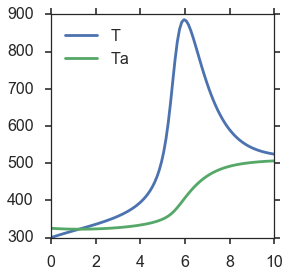

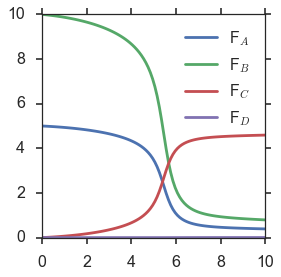

Maximum temperature reached is just under 900 K
Exit flow rates Fc=4.59, Fd=0.003ish mol/min
Selectivity C/D = about 1200


In [11]:
initial_values = (Fa0, Fb0, Fc0, Fd0, 1.0, T0, Ta0)
volumes = np.linspace(0,10,100)
result = scipy.integrate.odeint(dVector_dV, initial_values, volumes)
make_plots(result)

## Counter-current heat exchange


In [12]:
Ta_exit = 400. # guess the cooling fluid temperature at V=0
initial_values = (Fa0, Fb0, Fc0, Fd0, 1.0, T0, Ta_exit)
volumes = np.linspace(0,10,100)
result = scipy.integrate.odeint(dVector_dV, initial_values, volumes, args=('counter-current',))
Ta_entrance = result[-1][6] # cooling fluid temperature at V=10 dm3
print("With cooling water exit temperature {0}".format(Ta_exit))
print("Actual entrance Ta is {0}".format(Ta_entrance))
print("Target entrance Ta is Ta0 = {0}".format(Ta0))

# We could guess many times until we're right
# but instead we can use scipy.optimize.fsolve to find it for us
def make_this_zero(Ta_exit):
    "We want to find the Ta_exit that will make this function return zero"
     
    return 0####FIXME####

fsolve_result = scipy.optimize.fsolve(make_this_zero, 400)
print fsolve_result
Ta_exit = fsolve_result[0]

print("Trying again with Ta_exit = {0}".format(Ta_exit))
initial_values = (Fa0, Fb0, Fc0, Fd0, 1.0, T0, Ta_exit)
result = scipy.integrate.odeint(dVector_dV, initial_values, volumes, args=('counter-current',))
Ta_entrance = result[-1][6]
print("Actual entrance Ta is {0}".format(Ta_entrance))
print("Target entrance Ta is Ta0 = {0}".format(Ta0))

make_plots(result)

With cooling water exit temperature 400.0
Actual entrance Ta is 187.696323043
Target entrance Ta is Ta0 = 325
[ about 500ish ]
Trying again with Ta_exit = about 500ish
Actual entrance Ta is 325.000000816
Target entrance Ta is Ta0 = 325


Maximum temperature reached is about 1100 K!!
Exit flow rates Fc=4.59, Fd=0.003ish again mol/min
Selectivity C/D = about 1200


## Constant temperature heat exchange 
This is the case of having infinite cooling flowrate

In [13]:
initial_values = (Fa0, Fb0, Fc0, Fd0, 1.0, T0, Ta0)
result = scipy.integrate.odeint(dVector_dV, initial_values,
                                volumes, args=('constant-Ta',))
make_plots(result)

Maximum temperature reached is a bit over 800 K
Exit flow rates Fc=4.45, Fd=0.002ish mol/min
Selectivity C/D = about 1900


## Adiabatic

In [14]:
initial_values = (Fa0, Fb0, Fc0, Fd0, 1.0, T0, Ta0)
result = scipy.integrate.odeint(dVector_dV, initial_values,
                                volumes, args=('adiabatic',))
make_plots(result)

Maximum temperature reached is over 1500 K!!
Exit flow rates Fc=4.77, Fd=0.007ish mol/min
Selectivity C/D = under 700


Now play around with reversible reactions (with equilibrium constant being a function of temperature) and pressure drop...